In [1]:
# Convolution Neural Network
# Tries all the types
# Src for dataset:
# https://www.mvtec.com/company/research/datasets/mvtec-ad
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc, f1_score, roc_auc_score, precision_recall_curve,  \
    accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import shutil
import sys
from distutils.dir_util import copy_tree
import difflib

# Directory setup
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
print(nb_dir)

/Users/hakonsandaker/MEGA/Studier/H20/Machine Learning/Last project


# Copy images to right place

In [7]:
TYPE = ['toothbrush', 'bottle', 'screw', 'leather', 'transistor']
CASE_FOLDERS = []

for i in range(len(TYPE)):
    CASE_FOLDER = TYPE[i] + "_custom_folder"

    while os.path.exists(CASE_FOLDER):
        CASE_FOLDER += "_1"

    if not os.path.exists(CASE_FOLDER):
        os.makedirs(CASE_FOLDER)
    
    # Copy all the folders that are not good
    anomali_folders = [x[0] for x in os.walk(TYPE[i] + "/test/")]
    print(anomali_folders)
    for folder in anomali_folders:
        folder_1 = str(TYPE[i] + "/test/good")
        folder_2 = str(TYPE[i] + "/test/")
        
        if folder != folder_1 and folder != folder_2:
            print("Copying folder", folder)
            print("1", folder_1)
            print("1", folder_2)
            copy_tree(folder, CASE_FOLDER + '/test/defective')
    
    # Copy samples
    copy_tree(TYPE[i] + '/train/good', CASE_FOLDER + '/test/good')
    copy_tree(TYPE[i] + '/test/good', CASE_FOLDER + '/train/good')
    
    CASE_FOLDERS.append(CASE_FOLDER)

['toothbrush/test/', 'toothbrush/test/defective', 'toothbrush/test/good']
Copying folder toothbrush/test/defective
1 toothbrush/test/good
1 toothbrush/test/
['bottle/test/', 'bottle/test/broken_small', 'bottle/test/broken_large', 'bottle/test/good', 'bottle/test/contamination']
Copying folder bottle/test/broken_small
1 bottle/test/good
1 bottle/test/
Copying folder bottle/test/broken_large
1 bottle/test/good
1 bottle/test/
Copying folder bottle/test/contamination
1 bottle/test/good
1 bottle/test/
['screw/test/', 'screw/test/thread_top', 'screw/test/scratch_neck', 'screw/test/manipulated_front', 'screw/test/good', 'screw/test/scratch_head', 'screw/test/thread_side']
Copying folder screw/test/thread_top
1 screw/test/good
1 screw/test/
Copying folder screw/test/scratch_neck
1 screw/test/good
1 screw/test/
Copying folder screw/test/manipulated_front
1 screw/test/good
1 screw/test/
Copying folder screw/test/scratch_head
1 screw/test/good
1 screw/test/
Copying folder screw/test/thread_side
1

# CNN testing

Found 12 images belonging to 2 classes.
Train done...
Found 90 images belonging to 2 classes.
Vailidation done...
Train for 400 steps, validate for 100 steps
Epoch 1/15
23/23 [==============================] - 4s 171ms/step
<<<< toothbrush >>>>
>>>> Confusion matrix
[[30  0]
 [60  0]]
>>>> Accuracy 0.33
>>>> Precision 0.17
>>>> Recall 0.50
>>>> F1_score 0.25
>>>> ROC AUC: 0.65


/Users/hakonsandaker/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


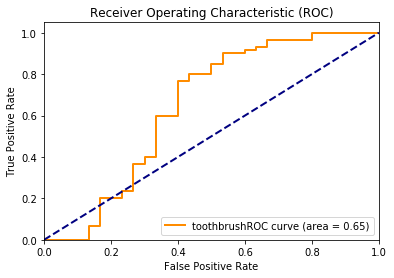




Found 20 images belonging to 2 classes.
Train done...
Found 231 images belonging to 2 classes.
Vailidation done...
Train for 400 steps, validate for 100 steps
Epoch 1/15
58/58 [==============================] - 6s 107ms/step
<<<< bottle >>>>
>>>> Confusion matrix
[[ 22   0]
 [209   0]]
>>>> Accuracy 0.10
>>>> Precision 0.05
>>>> Recall 0.50
>>>> F1_score 0.09
>>>> ROC AUC: 0.31


/Users/hakonsandaker/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


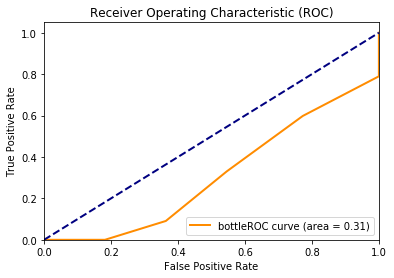




Found 41 images belonging to 2 classes.
Train done...
Found 345 images belonging to 2 classes.
Vailidation done...
Train for 400 steps, validate for 100 steps
Epoch 1/15
87/87 [==============================] - 7s 79ms/step
<<<< screw >>>>
>>>> Confusion matrix
[[ 25   0]
 [320   0]]
>>>> Accuracy 0.07
>>>> Precision 0.04
>>>> Recall 0.50
>>>> F1_score 0.07
>>>> ROC AUC: 0.29


/Users/hakonsandaker/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


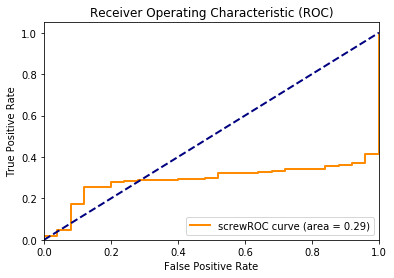




Found 32 images belonging to 2 classes.
Train done...
Found 264 images belonging to 2 classes.
Vailidation done...
Train for 400 steps, validate for 100 steps
Epoch 1/15
66/66 [==============================] - 10s 150ms/step
<<<< leather >>>>
>>>> Confusion matrix
[[ 19   0]
 [245   0]]
>>>> Accuracy 0.07
>>>> Precision 0.04
>>>> Recall 0.50
>>>> F1_score 0.07
>>>> ROC AUC: 0.02


/Users/hakonsandaker/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


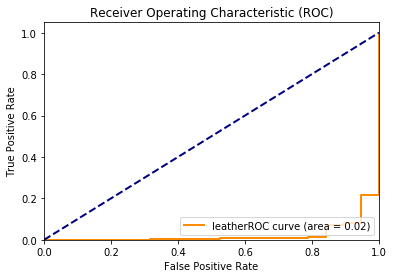




Found 60 images belonging to 2 classes.
Train done...
Found 223 images belonging to 2 classes.
Vailidation done...
Train for 400 steps, validate for 100 steps
Epoch 1/15
56/56 [==============================] - 11s 190ms/step
<<<< transistor >>>>
>>>> Confusion matrix
[[ 10   0]
 [213   0]]
>>>> Accuracy 0.04
>>>> Precision 0.02
>>>> Recall 0.50
>>>> F1_score 0.04
>>>> ROC AUC: 0.70


/Users/hakonsandaker/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


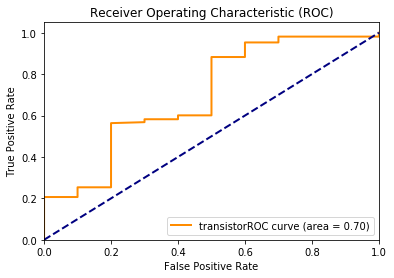

In [8]:
for i in range(len(CASE_FOLDERS)):
    CASE_FOLDER = CASE_FOLDERS[i]
    
    IMAGE_SIZE = 256

    TRAIN_DIR = CASE_FOLDER + '/train'
    VALID_DIR = CASE_FOLDER + '/test'

    train_datagen = ImageDataGenerator(rescale = 1/(255))
    validation_datagen = ImageDataGenerator(rescale = 1/(255))

    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        classes = ['defective', 'good'],
        target_size= (IMAGE_SIZE, IMAGE_SIZE),  # All images will be resized to 512x512
        batch_size= 120,
        class_mode='binary')
    print("Train done...")

    validation_generator = validation_datagen.flow_from_directory(
        VALID_DIR,
        classes = ['defective', 'good'],
        target_size= (IMAGE_SIZE, IMAGE_SIZE),
        batch_size= 4,
        class_mode= 'binary',
        shuffle= False)
    print("Vailidation done...")
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    tf.keras.layers.MaxPooling2D(2, 2)
    
    model = tf.keras.models.Sequential([
        # Note the input shape is the desired size of the image 512x512 with 3 bytes color
        # 1st convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # 2nd convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 3rd convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 4th convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # 5th convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(IMAGE_SIZE, activation='relu'),
        # Only 1 output neuron. 
        # It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])
    
    history = model.fit(train_generator, steps_per_epoch=400, 
    epochs=15, verbose=1, validation_data=validation_generator, validation_steps=100)

    model.evaluate(validation_generator)

    STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
    validation_generator.reset()

    preds = model.predict(x=validation_generator, verbose=1)
    y_pred = preds.argmax(axis=1)
    
    fpr, tpr, _thresholds = roc_curve(validation_generator.classes, preds)
    roc_auc = auc(fpr, tpr)
    
    print("<<<<", TYPE[i], ">>>>")
    print(">>>> Confusion matrix")
    print(confusion_matrix(validation_generator.classes, y_pred))

    print(">>>> Accuracy %.2f" % accuracy_score(validation_generator.classes, y_pred))
    print(">>>> Precision %.2f" % precision_score(validation_generator.classes, y_pred, average='macro'))
    print(">>>> Recall %.2f" % recall_score(validation_generator.classes, y_pred, average='macro'))
    print(">>>> F1_score %.2f" % f1_score(validation_generator.classes, y_pred, average='macro'))
    print('>>>> ROC AUC: %0.2f' % roc_auc)
    
    # Plot the ROC
    plt.figure()
    lw = 2
    roc_curve_label = 'ROC curve (area = %0.2f)' % roc_auc
    roc_curve_label = TYPE[i] + roc_curve_label
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label=roc_curve_label)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
    print("\n\n")